In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_excel('C:\\Users\\ADITYA\\Downloads\\Normalized Data Inventory - Well Logs.xlsx')
pd.set_option("max_rows", None)
print (df)

     Depth(ft.)  Caliper (in.)  GR (API)  RHOB (g/cc.)  Density Porosity  \
0          1200          4.130   209.760         2.604          0.003631   
1          1202          4.139   182.370         2.611         -0.000605   
2          1204          4.145   209.990         2.578          0.019367   
3          1206          4.131   163.030         2.626         -0.009684   
4          1208          4.144   221.040         2.634         -0.014526   
5          1210          4.134   188.280         2.575          0.021183   
6          1212          4.136   170.530         2.569          0.024814   
7          1214          4.141   130.120         2.588          0.013315   
8          1216          4.145   128.870         2.500          0.066575   
9          1218          4.139   146.940         2.568          0.025420   
10         1220          4.148   170.890         2.572          0.022999   
11         1222          4.139   146.180         2.593          0.010289   
12         1

In [8]:
sample_df = df
sample_df.shape
df1=sample_df.drop(columns =['Depth(ft.)', 'Density Calc.', 'Density Porosity', 'Vp(ft/sec)', 'Classification', 'lithology1',
       'lithology2'])
print(df1.columns)

Index(['Caliper (in.)', 'GR (API)', 'RHOB (g/cc.)', 'NPHI (%)',
       'delta T (usec/ft.)', 'Resistivity (ohm m)', 'IGR',
       'V shale (Larionov (1969) for Tertiary rocks)',
       'V shale(Steiber (1970))', 'V shale(Clavier (1971))',
       'V shale(Larionov (1969) for older rock)', 'Vs(ft/sec)'],
      dtype='object')


In [9]:
df1

,Caliper (in.),GR (API),RHOB (g/cc.),NPHI (%),delta T (usec/ft.),Resistivity (ohm m),IGR,V shale (Larionov (1969) for Tertiary rocks),V shale(Steiber (1970)),V shale(Clavier (1971)),V shale(Larionov (1969) for older rock),Vs(ft/sec)
0,4.130,209.760,2.604,30.404,73.836,34.832,0.748500,0.482934,0.498004,1.924718,0.601442,13543.53
1,4.139,182.370,2.611,31.390,80.343,28.783,0.577313,0.281834,0.312843,2.247907,0.404667,12446.64
2,4.145,209.990,2.578,30.167,77.210,20.026,0.749938,0.485024,0.499917,1.921588,0.603300,12951.69
3,4.131,163.030,2.626,28.718,72.681,30.054,0.456437,0.184586,0.218692,2.429664,0.291322,13758.75
4,4.144,221.040,2.634,33.283,79.113,19.104,0.819000,0.595093,0.601322,1.760661,0.697072,12640.15
5,4.134,188.280,2.575,30.567,73.635,26.652,0.614250,0.318085,0.346740,2.185506,0.443267,13580.50
6,4.136,170.530,2.569,26.147,70.279,113.730,0.503313,0.218768,0.252493,2.362963,0.333038,14229.00
7,4.141,130.120,2.588,29.540,68.446,65.679,0.250750,0.074894,0.100360,2.675043,0.137176,14610.06
8,4.145,128.870,2.500,28.754,64.706,72.464,0.242938,0.071762,0.096629,2.683023,0.132144,15454.52
9,4.139,146.940,2.568,24.782,67.419,72.540,0.355875,0.123755,0.155523,2.558558,0.210471,14832.61


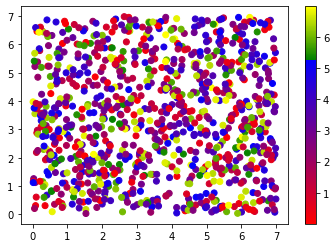

In [10]:
import matplotlib.colors as mcolors
import numpy as np


def make_colormap(df1):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    df1 = [(None,) * 3, 0.0] + list(df1) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(df1):
        if isinstance(item, float):
            r1, g1, b1 = df1[i - 1]
            r2, g2, b2 = df1[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)


c = mcolors.ColorConverter().to_rgb
rvb = make_colormap(
    [c('red'),  c('orange'), c('violet'), c('blue'),0.76 , c('green'), c('yellow')])
N = 1000
array_dg = np.random.uniform(0, 7, size=(N, 2))
colors = np.random.uniform(0, 7, size=(N,))
plt.scatter(array_dg[:, 0], array_dg[:, 1], c=colors, cmap=rvb)
plt.savefig('C:\\Users\\ADITYA\\Downloads\\to4.png')
plt.colorbar()

In [11]:
X = StandardScaler().fit_transform(df1)
X


array([[-1.85056477,  0.99711886, -1.17658153, ..., -0.95387037,
         0.99298708, -1.58194041],
       [-1.19219357,  0.16406738, -0.92293809, ..., -0.0049544 ,
         0.02587007, -2.80152164],
       [-0.75327944,  1.00411418, -2.11868572, ..., -0.9630621 ,
         1.00211899, -2.23997992],
       ...,
       [ 1.80705299,  0.60446846,  0.92503552, ..., -0.47338731,
         0.5085201 , -0.06779578],
       [ 1.07552944,  0.78421779,  1.46855717, ..., -0.68509892,
         0.72358841, -0.21785156],
       [ 1.58759592, -1.29886713, -1.10411198, ...,  1.16946657,
        -1.20474462,  2.09284732]])

In [12]:
k_means = KMeans(n_clusters=12)
k_means.fit(X)
print("k_means\n", k_means)


k_means
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [13]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02
mean,1.272125e-14,2.792178e-17,3.276155e-15,-1.254264e-16,4.919551e-16,5.761636e-18,1.972252e-16,-2.371135e-16,-2.216014e-16,-2.158398e-16,5.938918e-17,-1.530822e-15
std,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00
min,-2.728393e+00,-2.987325e+00,-4.944998e+00,-2.762735e+00,-2.613245e+00,-6.539589e-01,-2.987325e+00,-1.573469e+00,-1.790121e+00,-4.973536e+00,-2.113574e+00,-2.801522e+00
25%,-8.264318e-01,-6.577308e-01,-4.881208e-01,-6.780033e-01,-7.026684e-01,-4.238186e-01,-6.577308e-01,-7.315719e-01,-7.061564e-01,-5.681311e-01,-7.277909e-01,-6.463822e-01
50%,-1.680606e-01,6.339559e-02,9.163565e-02,-1.183967e-02,4.762096e-02,-2.671862e-01,6.339559e-02,-1.810352e-01,-1.476355e-01,9.325329e-02,-7.621238e-02,-1.064883e-01
75%,7.829200e-01,6.862833e-01,5.989225e-01,6.609240e-01,6.147727e-01,6.069542e-02,6.862833e-01,4.955661e-01,4.982107e-01,7.160765e-01,6.050463e-01,6.663723e-01
max,2.245967e+00,2.752336e+00,5.309443e+00,2.894156e+00,3.319612e+00,1.220142e+01,2.752336e+00,5.260834e+00,5.669236e+00,2.016401e+00,3.962906e+00,3.004734e+00


In [14]:
labels= k_means.predict(X)
centroid= k_means.cluster_centers_
centroid

array([[-6.61316481e-01,  1.72896259e-01, -4.29109852e-01,
         1.50699214e+00,  1.63014217e+00, -3.60914183e-01,
         1.72896259e-01, -3.40664567e-02, -1.15721018e-02,
        -4.03678026e-02,  6.04129629e-02, -1.51887067e+00],
       [ 8.54766080e-01,  2.79745442e-01,  4.50748171e-01,
        -4.77904379e-01, -4.37871132e-01, -1.69014903e-01,
         2.79745442e-01,  4.69596943e-02,  7.06254927e-02,
        -1.32300145e-01,  1.56708577e-01,  3.98890921e-01],
       [ 4.97625832e-01, -1.85232323e+00, -1.01314533e-01,
        -1.41387440e+00, -1.53001664e+00,  7.88021586e-01,
        -1.85232323e+00, -1.26967927e+00, -1.34475600e+00,
         1.48035917e+00, -1.53479603e+00,  1.62001262e+00],
       [ 9.58485670e-01,  1.09313290e+00,  6.80709593e-01,
         7.44385239e-02,  8.58617673e-02, -2.58321711e-01,
         1.09313290e+00,  1.09472521e+00,  1.06356997e+00,
        -1.09568623e+00,  1.12942692e+00, -1.33251879e-01],
       [-6.20410878e-01, -9.62458606e-01, -1.4110736

In [15]:
pd.DataFrame(centroid).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.054571,0.004231,-0.036648,-0.079055,-0.079068,0.385390,0.004231,0.103522,0.097278,-0.071753,0.058225,0.095136
std,0.785228,1.140575,0.642418,1.047059,1.048800,1.738352,1.140575,1.232835,1.232756,1.204909,1.188372,1.067288
min,-0.922227,-1.852323,-1.771004,-1.903899,-1.785781,-0.449821,-1.852323,-1.269679,-1.344756,-2.744912,-1.534796,-1.518871
25%,-0.630039,-0.759965,-0.169833,-0.639270,-0.665414,-0.346290,-0.759965,-0.771841,-0.756382,-0.606346,-0.793903,-0.556015
50%,-0.204276,-0.006577,0.012095,-0.000328,-0.064458,-0.213668,-0.006577,-0.207643,-0.179990,0.137292,-0.123746,0.020240
75%,0.831362,0.700617,0.363769,0.570928,0.526046,0.199232,0.700617,0.548910,0.547963,0.778657,0.639522,0.643115
max,1.322419,2.021724,0.680710,1.506992,1.630142,5.787119,2.021724,3.027508,3.020258,1.480359,2.566657,1.965937


In [16]:
sum_of_squared_distances = []
K = range(1,12)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)

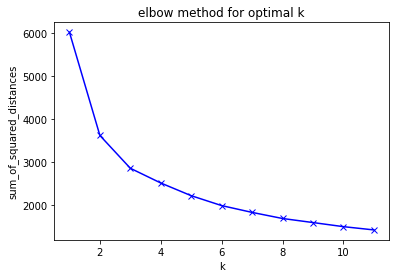

In [17]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.savefig('C:\\Users\\ADITYA\\Downloads\\to1.png')
plt.show()


In [18]:
k_means_3 = KMeans(n_clusters=3)
model = k_means_3.fit(X)
y_hat_4 = k_means_3.predict(X)
labels_4 = k_means_3.labels_
labels_4

array([2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0,
       0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0,
       2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 2, 2,
       2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0,
       2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0,
       2, 1, 0, 2, 2, 0, 0, 1, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0,

In [19]:
labels_4_dataframe = pd.DataFrame(labels_4) 
labels_4_dataframe

,0
0,2
1,0
2,2
3,0
4,2
5,0
6,0
7,0
8,1
9,0


In [20]:
metrics.silhouette_score(X, labels_4, metric = 'euclidean')

0.26399039945551894

In [21]:
metrics.calinski_harabasz_score(X, labels_4)

276.21835415916

In [22]:
frame = pd.DataFrame(X)
frame['cluster'] = y_hat_4
frame['cluster'].value_counts()

0    243
1    136
2    122
Name: cluster, dtype: int64

In [23]:
centers = model.cluster_centers_
centers


array([[-0.22315065,  0.05599474, -0.06433791,  0.19415118,  0.22159645,
        -0.17874635,  0.05599474, -0.14297925, -0.11806693,  0.07267154,
        -0.05682636, -0.24612115],
       [ 0.48385598, -1.19717332, -0.15321552, -1.0790979 , -1.11887055,
         0.65510734, -1.19717332, -0.97827816, -0.9973593 ,  1.06527172,
        -1.09629578,  1.15184864],
       [-0.09490825,  1.22302335,  0.2989461 ,  0.81621785,  0.805889  ,
        -0.37425603,  1.22302335,  1.37532614,  1.34697646, -1.33226342,
         1.33528714, -0.79380309]])

In [24]:
colNames=list(df1)
colNames.append('prediction')
colNames
        

['Caliper (in.)',
 'GR (API)',
 'RHOB (g/cc.)',
 'NPHI (%)',
 'delta T (usec/ft.)',
 'Resistivity (ohm m)',
 'IGR',
 'V shale (Larionov (1969) for Tertiary rocks)',
 'V shale(Steiber (1970))',
 'V shale(Clavier (1971))',
 'V shale(Larionov (1969) for older rock)',
 'Vs(ft/sec)',
 'prediction']

In [25]:
def pd_centers(colNames, centers):
    colNames = list(df1)
    colNames.append('prediction')
    Z=[np.append(A, index) for index, A in enumerate(centers)]

In [26]:
P = pd.DataFrame( columns=['Caliper (in.)','GR (API)', 'RHOB (g/cc.)','NPHI (%)', 'delta T (usec/ft.)', 'Resistivity (ohm m)', 'IGR', 'V shale (Larionov (1969) for Tertiary rocks)','V shale(Steiber (1970))','V shale(Clavier (1971))','V shale(Larionov (1969) for older rock)', 'Vs', 'prediction'])
P['prediction'] = P['prediction'].astype(int)

P

,Caliper (in.),GR (API),RHOB (g/cc.),NPHI (%),delta T (usec/ft.),Resistivity (ohm m),IGR,V shale (Larionov (1969) for Tertiary rocks),V shale(Steiber (1970)),V shale(Clavier (1971)),V shale(Larionov (1969) for older rock),Vs,prediction


In [27]:
y = np.random.uniform(0, 5, size=(4,))
print(y)

[1.51890069 0.90664392 1.88361267 0.73883994]


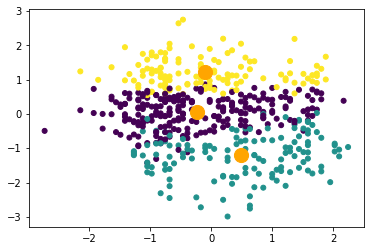

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y_hat_4, s=25, cmap='viridis')


plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=200, alpha=1);
plt.savefig('C:\\Users\\ADITYA\\Downloads\\to3.png')
plt.show()

In [29]:
cluster_counts = [241, 138, 122]
x= [0,1,2]
y_cluster = cluster_counts
print(cluster_counts)
plt.bar(x , y_cluster, color = rvb (x/7))
plt.xlabel('cluster number', size=20);
plt.ylabel('# of points', size=20);
plt.tick_params(direction='out', length=6, width=2, colors='k')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True, which='major', axis='y', color="white", linewidth=1, zorder=1)

[241, 138, 122]


TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [30]:
conditions1 = [
    (df['GR (API)'] > 0) & (df['GR (API)'] <= 2),
    (df['GR (API)'] > 0) & (df['GR (API)'] <= 4),
    (df['GR (API)'] > 4) & (df['GR (API)'] <= 14),
    (df['GR (API)'] > 14) & (df['GR (API)'] <= 50),
    (df['GR (API)'] > 50) & (df['GR (API)'] <= 75),
    (df['GR (API)'] > 75) & (df['GR (API)'] <= 85),
    (df['GR (API)'] > 85) & (df['GR (API)'] <= 100),
    (df['GR (API)'] > 100) & (df['GR (API)'] <= 125),
    (df['GR (API)'] > 125) & (df['GR (API)'] <= 200),
    (df['GR (API)'] > 125)
    ]
values1 = ['Anhydrite', 'Coal', 'Clean Sand', 'Shaley Sand', 'Sandy Shale', 'Silty Sand', 'Fine Siltstone', 'Muddy Siltstone', 'Claystone + Siltstone', 'Black Shale']
df['lithology1'] = np.select(conditions1, values1)

In [31]:
conditions2 = [
    (df['delta T (usec/ft.)'] == 189),
    (df['delta T (usec/ft.)'] == 200),
    (df['delta T (usec/ft.)'] ==238),
    (df['delta T (usec/ft.)'] == 626),
    (df['delta T (usec/ft.)'] == 49),
    (df['delta T (usec/ft.)'] == 50),
    (df['delta T (usec/ft.)'] > 38.5) & (df['delta T (usec/ft.)'] <= 43.5),
    (df['delta T (usec/ft.)'] > 43.5) & (df['delta T (usec/ft.)'] <= 47.6),
    (df['delta T (usec/ft.)'] > 51.3) & (df['delta T (usec/ft.)'] <= 60),
    (df['delta T (usec/ft.)'] > 60) & (df['delta T (usec/ft.)'] <= 170),
    ]
values2 = ['brine', 'freshwater', 'Oil', 'Methane', 'Basalt', 'Anhydrite', 'Dolomite', 'limestone', 'Sandstone', 'Shale']
df['lithology2'] = np.select(conditions2, values2)

In [32]:
print(df)

     Depth(ft.)  Caliper (in.)  GR (API)  RHOB (g/cc.)  Density Porosity  \
0          1200          4.130   209.760         2.604          0.003631   
1          1202          4.139   182.370         2.611         -0.000605   
2          1204          4.145   209.990         2.578          0.019367   
3          1206          4.131   163.030         2.626         -0.009684   
4          1208          4.144   221.040         2.634         -0.014526   
5          1210          4.134   188.280         2.575          0.021183   
6          1212          4.136   170.530         2.569          0.024814   
7          1214          4.141   130.120         2.588          0.013315   
8          1216          4.145   128.870         2.500          0.066575   
9          1218          4.139   146.940         2.568          0.025420   
10         1220          4.148   170.890         2.572          0.022999   
11         1222          4.139   146.180         2.593          0.010289   
12         1

In [33]:
pca = PCA(n_components=5)
pca.fit(df1)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
features = ['Caliper (in.)', 'GR (API)', 'RHOB (g/cc.)', 'NPHI (%)',
       'delta T (usec/ft.)', 'Resistivity (ohm m)', 'IGR',
       'V shale (Larionov (1969) for Tertiary rocks)',
       'V shale(Steiber (1970))', 'V shale(Clavier (1971))',
       'V shale(Larionov (1969) for older rock)', 'Vs(ft/sec)']
x = df.loc[:, features].values

In [35]:
y = df.loc[:, ['lithology1']].values

In [36]:
y

array([['Black Shale'],
       ['Claystone + Siltstone'],
       ['Black Shale'],
       ['Claystone + Siltstone'],
       ['Black Shale'],
       ['Claystone + Siltstone'],
       ['Claystone + Siltstone'],
       ['Claystone + Siltstone'],
       ['Claystone + Siltstone'],
       ['Claystone + Siltstone'],
       ['Claystone + Siltstone'],
       ['Claystone + Siltstone'],
       ['Claystone + Siltstone'],
       ['Claystone + Siltstone'],
       ['Black Shale'],
       ['Black Shale'],
       ['Claystone + Siltstone'],
       ['Black Shale'],
       ['Claystone + Siltstone'],
       ['Claystone + Siltstone'],
       ['Claystone + Siltstone'],
       ['Claystone + Siltstone'],
       ['Claystone + Siltstone'],
       ['Black Shale'],
       ['Claystone + Siltstone'],
       ['Claystone + Siltstone'],
       ['Claystone + Siltstone'],
       ['Claystone + Siltstone'],
       ['Claystone + Siltstone'],
       ['Claystone + Siltstone'],
       ['Claystone + Siltstone'],
       ['Claysto

In [37]:
x = StandardScaler().fit_transform(x)

In [38]:
x


array([[-1.85056477,  0.99711886, -1.17658153, ..., -0.95387037,
         0.99298708, -1.58194041],
       [-1.19219357,  0.16406738, -0.92293809, ..., -0.0049544 ,
         0.02587007, -2.80152164],
       [-0.75327944,  1.00411418, -2.11868572, ..., -0.9630621 ,
         1.00211899, -2.23997992],
       ...,
       [ 1.80705299,  0.60446846,  0.92503552, ..., -0.47338731,
         0.5085201 , -0.06779578],
       [ 1.07552944,  0.78421779,  1.46855717, ..., -0.68509892,
         0.72358841, -0.21785156],
       [ 1.58759592, -1.29886713, -1.10411198, ...,  1.16946657,
        -1.20474462,  2.09284732]])

In [39]:
pd.DataFrame(data = x, columns = features).head()

,Caliper (in.),GR (API),RHOB (g/cc.),NPHI (%),delta T (usec/ft.),Resistivity (ohm m),IGR,V shale (Larionov (1969) for Tertiary rocks),V shale(Steiber (1970)),V shale(Clavier (1971)),V shale(Larionov (1969) for older rock),Vs(ft/sec)
0,-1.850565,0.997119,-1.176582,1.370208,1.693860,-0.535149,0.997119,0.925941,0.902792,-0.953870,0.992987,-1.581940
1,-1.192194,0.164067,-0.922938,1.587129,3.319612,-0.580844,0.164067,-0.086156,-0.055393,-0.004954,0.025870,-2.801522
2,-0.753279,1.004114,-2.118686,1.318068,2.536843,-0.646994,1.004114,0.936461,0.912689,-0.963062,1.002119,-2.239980
3,-1.777412,-0.424148,-0.379416,0.999286,1.405287,-0.571243,-0.424148,-0.575586,-0.542612,0.528701,-0.531204,-1.342647
4,-0.826432,1.340194,-0.089538,2.003591,3.012301,-0.653959,1.340194,1.490417,1.437447,-1.435559,1.462995,-2.586367


In [40]:
pca = PCA(n_components=2)

In [41]:
principalComponents = pca.fit_transform(x)

In [42]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [43]:
principalDf

,principal component 1,principal component 2
0,3.494651,-2.000595
1,2.428091,-3.842579
2,3.789606,-2.306387
3,0.263573,-3.070808
4,5.281916,-1.833962
5,1.857889,-2.999646
6,-0.086334,-2.465198
7,-2.071976,-3.209557
8,-2.961799,-3.203517
9,-1.772870,-2.465181


In [44]:
df[['lithology1']]

,lithology1
0,Black Shale
1,Claystone + Siltstone
2,Black Shale
3,Claystone + Siltstone
4,Black Shale
5,Claystone + Siltstone
6,Claystone + Siltstone
7,Claystone + Siltstone
8,Claystone + Siltstone
9,Claystone + Siltstone


In [45]:
finalDf = pd.concat([principalDf, df[['lithology1']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,lithology1
0,3.494651,-2.000595,Black Shale
1,2.428091,-3.842579,Claystone + Siltstone
2,3.789606,-2.306387,Black Shale
3,0.263573,-3.070808,Claystone + Siltstone
4,5.281916,-1.833962,Black Shale


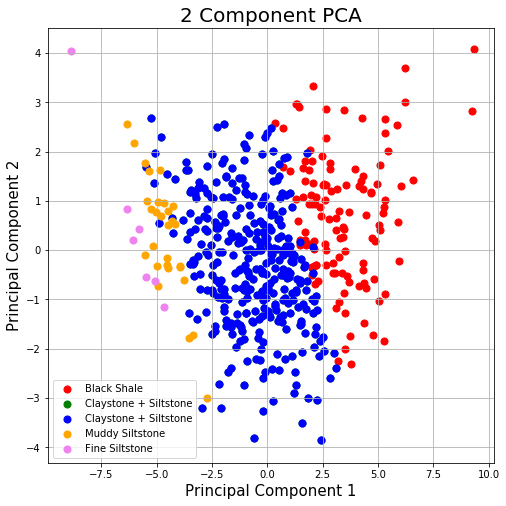

In [46]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Black Shale', 'Claystone + Siltstone', 'Claystone + Siltstone', 'Muddy Siltstone', 'Fine Siltstone']
colors = ['red', 'green', 'blue', 'orange', 'violet']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['lithology1'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [47]:
pca.explained_variance_ratio_

array([0.63428257, 0.15457052])

In [48]:
df2 = pd.read_excel('C:\\Users\\ADITYA\\desktop\\New folder\\lithology.xlsx')
pd.set_option("max_rows", None)
print (df2)

     Unnamed: 0  Depth(ft.)  Caliper (in.)  GR (API)  RHOB (g/cc.)  \
0             0        1200          4.130   209.760         2.604   
1             1        1202          4.139   182.370         2.611   
2             2        1204          4.145   209.990         2.578   
3             3        1206          4.131   163.030         2.626   
4             4        1208          4.144   221.040         2.634   
5             5        1210          4.134   188.280         2.575   
6             6        1212          4.136   170.530         2.569   
7             7        1214          4.141   130.120         2.588   
8             8        1216          4.145   128.870         2.500   
9             9        1218          4.139   146.940         2.568   
10           10        1220          4.148   170.890         2.572   
11           11        1222          4.139   146.180         2.593   
12           12        1224          4.140   196.080         2.577   
13           13     

In [49]:
#Initiating model creation using Linear Regression
A = pd.DataFrame(np.c_[df2['V shale(Steiber (1970))']], columns = ['V shale(Steiber (1970))'])
B = df2['Classification']

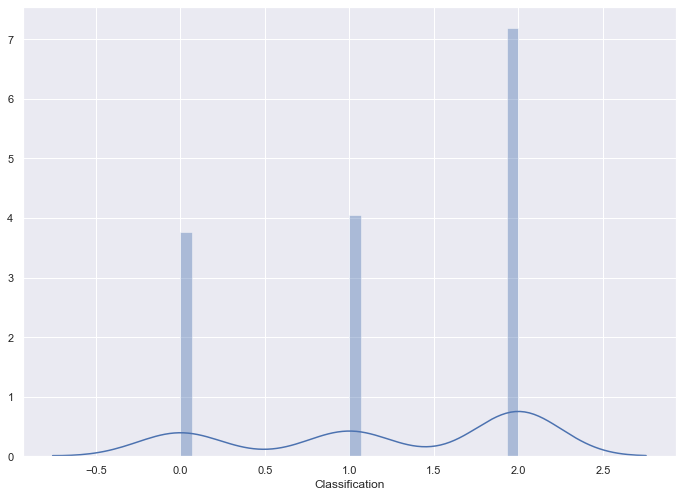

In [50]:
#distance plot for classification of lithology
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(B, bins=30)
plt.show()

In [51]:
#creating correlation matrix for evaluating which parameter is most closely related to classification
matrix = df2.corr().round(2)

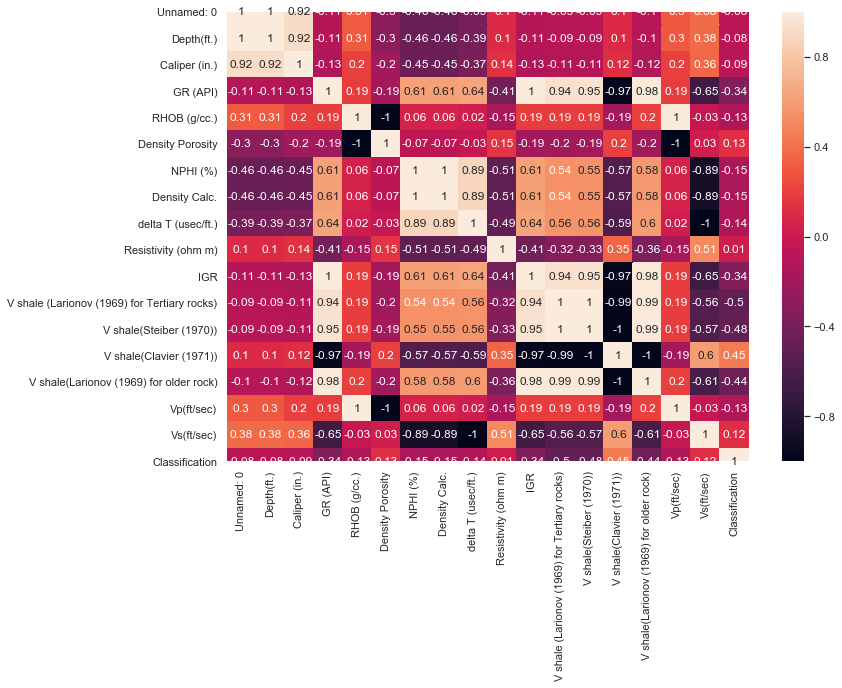

In [52]:
sns.heatmap(data=matrix, annot=True)

In [53]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size = 0.2, random_state=5)
print(A_train.shape)
print(A_test.shape)
print(B_train.shape)
print(B_test.shape)

(400, 1)
(101, 1)
(400,)
(101,)


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(A_train, B_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
# model evaluation for training set

b_train_predict = lin_model.predict(A_train)
rmse = (np.sqrt(mean_squared_error(B_train, b_train_predict)))
r2 = r2_score(B_train, b_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

b_test_predict = lin_model.predict(A_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(B_test, b_test_predict)))

# r-squared score of the model
r2 = r2_score(B_test, b_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))



The model performance for training set
--------------------------------------
RMSE is 0.7257914796266687
R2 score is 0.23238168376955137


The model performance for testing set
--------------------------------------
RMSE is 0.7225212903415742
R2 score is 0.18598294252783543


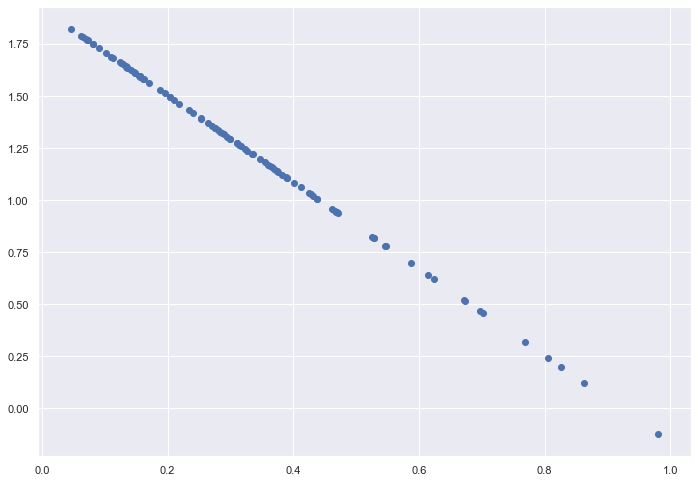

In [58]:
#plot for the model (lithology no. on x axis & normalized Vsh on y axis)
plt.scatter(A_test, b_test_predict)
plt.show()

In [59]:
#prediction of lithology for testing set
c1=b_test_predict.astype(int)
c2=np.absolute(c1)
c3=pd.DataFrame(c2)
c3

,0
0,1
1,1
2,0
3,1
4,1
5,1
6,1
7,0
8,1
9,1


In [60]:
#prediction of lithology for entire set
predicted_test=lin_model.predict (df2[['Classification']])
rounded = predicted_test.astype(int)
modded=np.abs(rounded)
entire_classification=pd.DataFrame(modded)
entire_classification

,0
0,1
1,2
2,1
3,2
4,1
5,2
6,2
7,2
8,0
9,2
